In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [ ]:
# !pip install -q kaggle

In [ ]:
# %cd /content/gdrive/MyDrive/Capstone Project Kaggle Dataset/API Kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Capstone_Project/API_Kaggle"

In [ ]:
!kaggle datasets download sriramr/fruits-fresh-and-rotten-for-classification

 99% 3.56G/3.58G [00:46<00:00, 77.9MB/s]
100% 3.58G/3.58G [00:46<00:00, 83.0MB/s]


In [ ]:
import zipfile

local_zip = r'/content/fruits-fresh-and-rotten-for-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')

In [ ]:
dataset_dir = '/tmp/dataset/'
dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_test_dir = os.path.join(dataset_dir, 'test')

print('Address Train Dataset : {}'.format(dataset_train_dir))
print('Address Test Dataset : {}'.format(dataset_test_dir))

Address Train Dataset : /tmp/dataset/train
Address Test Dataset : /tmp/dataset/test


In [ ]:
list_train_dataset = os.listdir(dataset_train_dir)
print('List Dataset Train : {}'.format(list_train_dataset))

List Dataset Train : ['freshoranges', 'rottenapples', 'freshapples', 'freshbanana', 'rottenoranges', 'rottenbanana']


In [ ]:
list_test_dataset = os.listdir(dataset_test_dir)
print('List Dataset Test : {}'.format(list_test_dataset))

List Dataset Test : ['freshoranges', 'rottenapples', 'freshapples', 'freshbanana', 'rottenoranges', 'rottenbanana']


In [ ]:
def total_num_files(PATH, DIRECTORY):
  selected_dir = os.path.join(PATH, DIRECTORY)
  number_of_files = len(os.listdir(selected_dir))
  return number_of_files

In [ ]:
print('Total Number of Files in Train Dataset :')
for fruit_classification in list_train_dataset:
  print('{} folder : {} file'.format(fruit_classification, total_num_files(dataset_train_dir, fruit_classification)))

Total Number of Files in Train Dataset :
freshoranges folder : 1466 file
rottenapples folder : 2342 file
freshapples folder : 1693 file
freshbanana folder : 1581 file
rottenoranges folder : 1595 file
rottenbanana folder : 2224 file


In [ ]:
print('Total Number of Files in Test Dataset :')
for fruit_classification in list_test_dataset:
  print('{} folder : {} file'.format(fruit_classification, total_num_files(dataset_test_dir, fruit_classification)))

Total Number of Files in Test Dataset :
freshoranges folder : 388 file
rottenapples folder : 601 file
freshapples folder : 395 file
freshbanana folder : 381 file
rottenoranges folder : 403 file
rottenbanana folder : 530 file


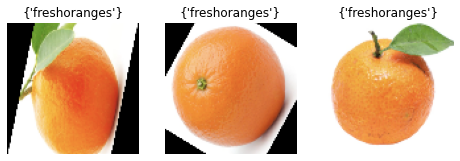

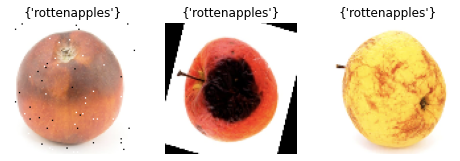

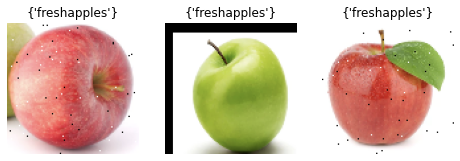

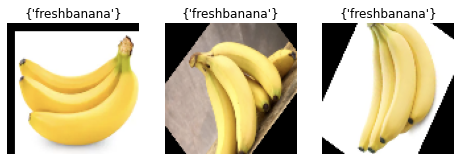

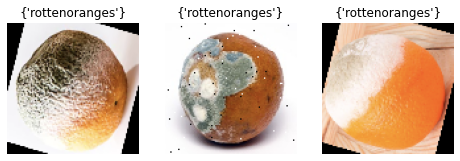

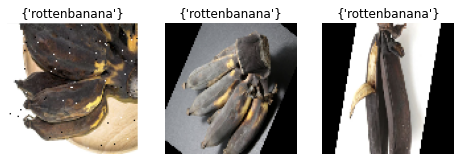

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

def plot_image(image_file):
  image_path = [file for file in os.listdir('{}/{}'.format(dataset_train_dir, image_file))]
  select_image = np.random.choice(image_path, 3, replace = False)

  fig = plt.figure(figsize = (8,6))
  for i in range(3):
    if i < 3:
      image_select = '{}/{}/{}'.format(dataset_train_dir, image_file, select_image[i])
      label = {image_file}

    ax = fig.add_subplot(1,3,i+1)

    image_show = image.load_img(image_select, target_size = (100,100))
    plt.imshow(image_show)
    plt.title(label)
    plt.axis('off')
  plt.show()

for fruit_classification in list_train_dataset:
  plot_image(fruit_classification)

In [ ]:
def create_dir(PATH):
  if not os.path.exists(PATH):
    os.mkdir(PATH)
    return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [ ]:
try:
  base_dir = '/content/'
  fruit_dir = create_dir(os.path.join(base_dir, 'fruits-fresh-and-rotten-for-classification'))
  train_dir = create_dir(os.path.join(fruit_dir, 'train'))
  validation_dir = create_dir(os.path.join(fruit_dir, 'val'))
  test_dir = create_dir(os.path.join(fruit_dir, 'test'))

  for fruit_classification in list_train_dataset:
    create_dir(os.path.join(train_dir, fruit_classification))
    create_dir(os.path.join(validation_dir, fruit_classification))
    create_dir(os.path.join(test_dir, fruit_classification))

except OSError:
  pass

In [ ]:
# List Alamat Fruit Classification di dalam direktori Dataset Train
fruit_classification_train_dataset_dir = {}
for fruit_classification in list_train_dataset:
  fruit_classification_train_dataset_dir.update({'{}'.format(fruit_classification) : '{}'.format(os.path.join(dataset_train_dir, fruit_classification))})

print('Addres of Fruit Classification in Train Dataset :')
for key, val in fruit_classification_train_dataset_dir.items():
  print('{} : {}'.format(key, val))

Addres of Fruit Classification in Train Dataset :
freshoranges : /tmp/dataset/train/freshoranges
rottenapples : /tmp/dataset/train/rottenapples
freshapples : /tmp/dataset/train/freshapples
freshbanana : /tmp/dataset/train/freshbanana
rottenoranges : /tmp/dataset/train/rottenoranges
rottenbanana : /tmp/dataset/train/rottenbanana


In [ ]:
# List Alamat Fruit Classification di dalam direktori Dataset Test
fruit_classification_test_dataset_dir = {}
for fruit_classification in list_train_dataset:
  fruit_classification_test_dataset_dir.update({'{}'.format(fruit_classification) : '{}'.format(os.path.join(dataset_test_dir, fruit_classification))})

print('Addres of Fruit Classification in Test Dataset :')
for key, val in fruit_classification_test_dataset_dir.items():
  print('{} : {}'.format(key, val))

Addres of Fruit Classification in Test Dataset :
freshoranges : /tmp/dataset/test/freshoranges
rottenapples : /tmp/dataset/test/rottenapples
freshapples : /tmp/dataset/test/freshapples
freshbanana : /tmp/dataset/test/freshbanana
rottenoranges : /tmp/dataset/test/rottenoranges
rottenbanana : /tmp/dataset/test/rottenbanana


In [ ]:
# List Alamat Fruit Classification di dalam direktori Train
fruit_classification_train_dir = {}
for fruit_classification in list_train_dataset:
  fruit_classification_train_dir.update({'{}'.format(fruit_classification) : '{}'.format(os.path.join(train_dir, fruit_classification))})

print('Addres of Fruit Classification in Train :')
for key, val in fruit_classification_train_dir.items():
  print('{} : {}'.format(key, val))

Addres of Fruit Classification in Train :
freshoranges : /content/fruits-fresh-and-rotten-for-classification/train/freshoranges
rottenapples : /content/fruits-fresh-and-rotten-for-classification/train/rottenapples
freshapples : /content/fruits-fresh-and-rotten-for-classification/train/freshapples
freshbanana : /content/fruits-fresh-and-rotten-for-classification/train/freshbanana
rottenoranges : /content/fruits-fresh-and-rotten-for-classification/train/rottenoranges
rottenbanana : /content/fruits-fresh-and-rotten-for-classification/train/rottenbanana


In [ ]:
# List Alamat Fruit Classification di dalam direktori Val
fruit_classification_val_dir = {}
for fruit_classification in list_train_dataset:
  fruit_classification_val_dir.update({'{}'.format(fruit_classification) : '{}'.format(os.path.join(validation_dir, fruit_classification))})

print('Addres of Fruit Classification in Train Dataset :')
for key, val in fruit_classification_val_dir.items():
  print('{} : {}'.format(key, val))

Addres of Fruit Classification in Train Dataset :
freshoranges : /content/fruits-fresh-and-rotten-for-classification/val/freshoranges
rottenapples : /content/fruits-fresh-and-rotten-for-classification/val/rottenapples
freshapples : /content/fruits-fresh-and-rotten-for-classification/val/freshapples
freshbanana : /content/fruits-fresh-and-rotten-for-classification/val/freshbanana
rottenoranges : /content/fruits-fresh-and-rotten-for-classification/val/rottenoranges
rottenbanana : /content/fruits-fresh-and-rotten-for-classification/val/rottenbanana


In [ ]:
# List Alamat Fruit Classification di dalam direktori Test
fruit_classification_test_dir = {}
for fruit_classification in list_train_dataset:
  fruit_classification_test_dir.update({'{}'.format(fruit_classification) : '{}'.format(os.path.join(test_dir, fruit_classification))})

print('Addres of Fruit Classification in Train Dataset :')
for key, val in fruit_classification_test_dir.items():
  print('{} : {}'.format(key, val))

Addres of Fruit Classification in Train Dataset :
freshoranges : /content/fruits-fresh-and-rotten-for-classification/test/freshoranges
rottenapples : /content/fruits-fresh-and-rotten-for-classification/test/rottenapples
freshapples : /content/fruits-fresh-and-rotten-for-classification/test/freshapples
freshbanana : /content/fruits-fresh-and-rotten-for-classification/test/freshbanana
rottenoranges : /content/fruits-fresh-and-rotten-for-classification/test/rottenoranges
rottenbanana : /content/fruits-fresh-and-rotten-for-classification/test/rottenbanana


In [ ]:
import random
from PIL import Image
from shutil import copyfile

def split_data(SOURCE_TRAIN, SOURCE_TEST, TRAINING, VALIDATION, TEST):
  data_train = os.listdir(SOURCE_TRAIN)
  data_test = os.listdir(SOURCE_TEST)
  
  data_random_train = random.sample(data_train, len(data_train))
  data_random_test = random.sample(data_test, len(data_test))

  split_data_train_and_val = 0.9
  split_data_test_and_val = 0.9

  train_size = len(data_train) * split_data_train_and_val
  val_size = len(data_test) * split_data_test_and_val

  for i, image_name in enumerate(data_random_train):
    image_path = os.path.join(SOURCE_TRAIN, image_name)
    if os.path.getsize(image_path) > 0:
      if i < train_size:
        copyfile(image_path, os.path.join(TRAINING, image_name))
      else:
        copyfile(image_path, os.path.join(VALIDATION, image_name))
  
  for i, image_name in enumerate(data_random_test):
    image_path = os.path.join(SOURCE_TEST, image_name)
    if os.path.getsize(image_path) > 0:
      if i < val_size:
        copyfile(image_path, os.path.join(VALIDATION, image_name))
      else:
        copyfile(image_path, os.path.join(TEST, image_name))

In [ ]:
for fruit_classification in list_train_dataset:
  split_data(
      fruit_classification_train_dataset_dir[fruit_classification],
      fruit_classification_test_dataset_dir[fruit_classification],
      fruit_classification_train_dir[fruit_classification],
      fruit_classification_val_dir[fruit_classification],
      fruit_classification_test_dir[fruit_classification]
  )

In [ ]:
for fruit_classification in list_train_dataset:
  print('There are {} files in {} train dir'.format(total_num_files(train_dir, fruit_classification), fruit_classification))
  print('There are {} files in {} validation dir'.format(total_num_files(validation_dir, fruit_classification), fruit_classification))
  print('There are {} files in {} test dir'.format(total_num_files(test_dir, fruit_classification), fruit_classification))
  print('')

There are 1320 files in freshoranges train dir
There are 496 files in freshoranges validation dir
There are 38 files in freshoranges test dir

There are 2108 files in rottenapples train dir
There are 775 files in rottenapples validation dir
There are 60 files in rottenapples test dir

There are 1524 files in freshapples train dir
There are 525 files in freshapples validation dir
There are 39 files in freshapples test dir

There are 1423 files in freshbanana train dir
There are 501 files in freshbanana validation dir
There are 38 files in freshbanana test dir

There are 1436 files in rottenoranges train dir
There are 522 files in rottenoranges validation dir
There are 40 files in rottenoranges test dir

There are 2002 files in rottenbanana train dir
There are 699 files in rottenbanana validation dir
There are 53 files in rottenbanana test dir



In [ ]:
import tensorflow as tf
print('Using TensorFlow Version:', tf.__version__)

Using TensorFlow Version: 2.8.2


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

val_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1.0 / 255.0
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (128, 128),
    batch_size = 32,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (128, 128),
    batch_size = 32,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size = 32,
    target_size = (128, 128),
    class_mode = 'categorical'
)

Found 9813 images belonging to 6 classes.
Found 3518 images belonging to 6 classes.
Found 268 images belonging to 6 classes.


In [ ]:
print(train_generator.class_indices)

{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}


In [ ]:
print(val_generator.class_indices)

{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}


In [ ]:
print(test_generator.class_indices)

{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.99 and logs.get('val_accuracy') > 0.99):
      self.model.stop_training = True
      print('\nThe accuracy of the training and validation has reached > 99%')
callbacks = myCallback()

In [ ]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint
earlystop = callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'min', patience = 20,
    restore_best_weights = True
)

In [ ]:
# Hasil Transfer Learning dengan MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

# MobileNetV2
pre_trained_model = MobileNetV2(
    input_shape = (128, 128, 3),
    include_top = False,
    weights = 'imagenet'
)

for layer in pre_trained_model.layers:
  layer.trainable = False

x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)           
x = layers.Dense(6, activation='softmax')(x)

model = Model(pre_trained_model.input, x) 

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']         

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer = 'Adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
# Menghitung jumlah file training dan validation
total_train_file = 0
total_val_file = 0
total_test_file = 0
for fruit_classification in list_train_dataset:
  total_train_file += len(os.listdir(os.path.join(train_dir, fruit_classification)))
  total_val_file += len(os.listdir(os.path.join(validation_dir, fruit_classification)))
  total_test_file += len(os.listdir(os.path.join(test_dir, fruit_classification)))

print("There are {} files in training directory".format(total_train_file))
print("There are {} files in validation directory".format(total_val_file))
print("There are {} files in validation directory".format(total_test_file))

There are 9813 files in training directory
There are 3518 files in validation directory
There are 268 files in validation directory


In [ ]:
modelcheck = ModelCheckpoint('fruits_fresh_and_rotten_for_classification.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
# Hasil Edit History berdasarkan perubahan Steps per epoch
history = model.fit(
    train_generator,
    steps_per_epoch = (total_train_file / 32),
    epochs = 100,
    validation_data = val_generator,
    validation_steps = (total_val_file / 32),
    callbacks = [earlystop, modelcheck],
    verbose = 1
)

Epoch 1/100
307/306 [==============================] - ETA: 0s - loss: 1.1715 - accuracy: 0.8885
Epoch 1: val_accuracy improved from -inf to 0.94656, saving model to fruits_fresh_and_rotten_for_classification.h5
306/306 [==============================] - 163s 526ms/step - loss: 1.1715 - accuracy: 0.8885 - val_loss: 0.1437 - val_accuracy: 0.9466
Epoch 2/100
307/306 [==============================] - ETA: 0s - loss: 0.1690 - accuracy: 0.9434
Epoch 2: val_accuracy improved from 0.94656 to 0.95424, saving model to fruits_fresh_and_rotten_for_classification.h5
306/306 [==============================] - 153s 499ms/step - loss: 0.1690 - accuracy: 0.9434 - val_loss: 0.1407 - val_accuracy: 0.9542
Epoch 3/100
307/306 [==============================] - ETA: 0s - loss: 0.1404 - accuracy: 0.9526
Epoch 3: val_accuracy improved from 0.95424 to 0.95821, saving model to fruits_fresh_and_rotten_for_classification.h5
306/306 [==============================] - 154s 503ms/step - loss: 0.1404 - accuracy: 0.

In [ ]:
from keras.models import load_model
saved_model = load_model('fruits_fresh_and_rotten_for_classification.h5')

<function matplotlib.pyplot.show>

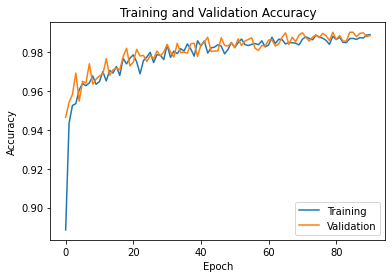

In [ ]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'best')
plt.show

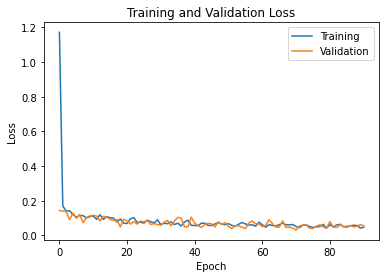

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'best')
plt.show()

In [ ]:
# Test Model
print('Test Model')
loss, acc = model.evaluate(test_generator, steps = (total_test_file / 32), verbose = 1)
print('accuracy test : {} %'.format(acc * 100))
print('loss test : {} %'.format(loss * 100))

Test Model
8/8 [==============================] - 2s 268ms/step - loss: 0.0034 - accuracy: 0.9963
accuracy test : 99.6268630027771 %
loss test : 0.3422742011025548 %


Saving istockphoto-1226808018-612x612.jpg to istockphoto-1226808018-612x612.jpg
[[3.3258098e-06 6.0046079e-11 1.1412527e-02 3.5815054e-04 2.7970037e-10
  9.8822600e-01]]


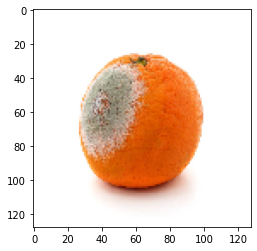

In [ ]:
from tensorflow.keras.utils import get_file
from google.colab import files
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import pathlib
import cv2

model_predict = load_model('fruits_fresh_and_rotten_for_classification.h5')
model_predict.compile(
    optimizer = 'Adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

uploaded = files.upload()

for image_path in uploaded.keys():
  img = image.load_img(image_path, color_mode = 'rgb', target_size = (128, 128, 3), interpolation = 'nearest')
  img_plot = plt.imshow(img)
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  images = np.vstack([img])
  classes = model.predict(images, batch_size = 32)
  predict = np.argmax(classes)

  print(classes)

  if classes[0, 0] == 1.0:
    print(image_path)
    print('Predict Fruit Category : Fresh Apples')
    print('Predict Confidence : {} %'.format(round(float(classes[0, 0]) * 100, 2)))
  elif classes[0, 1] == 1.0:
    print(image_path)
    print('Predict Fruit Category : Fresh Banana')
    print('Predict Confidence : {} %'.format(round(float(classes[0, 1]) * 100, 2)))
  elif classes[0, 2] == 1.0:
    print(image_path)
    print('Predict Fruit Category : Fresh Oranges')
    print('Predict Confidence : {} %'.format(round(float(classes[0, 2]) * 100, 2)))
  elif classes[0, 3] == 1.0:
    print(image_path)
    print('Predict Fruit Category : Rotten Apples')
    print('Predict Confidence : {} %'.format(round(float(classes[0, 3]) * 100, 2)))
  elif classes[0, 4] == 1.0:
    print(image_path)
    print('Predict Fruit Category : Rotten Banana')
    print('Predict Confidence : {} %'.format(round(float(classes[0, 4]) * 100, 2)))
  elif classes[0, 5] == 1.0:
    print(image_path)
    print('Predict Fruit Category : Rotten Oranges')
    print('Predict Confidence : {} %'.format(round(float(classes[0, 5]) * 100, 2)))

In [ ]:
% cd /content/gdrive/MyDrive/Capstone Project Kaggle Dataset/Fresh_and_Rotten_Fruit_Classification_MobileNetV2

/content/gdrive/MyDrive/Capstone Project Kaggle Dataset/Fresh_and_Rotten_Fruit_Classification_MobileNetV2


In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 2848
drwxr-xr-x 2 root root    4096 Jun  3 17:51 assets
-rw-r--r-- 1 root root  351086 Jun  3 17:51 keras_metadata.pb
-rw-r--r-- 1 root root 2555430 Jun  3 17:51 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  3 17:51 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
tflite_converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
tflite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = tflite_converter.convert()

# Write TFLite model
tflite_model_file = 'fruits_fresh_and_rotten_for_classification.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruits_fresh_and_rotten_for_classification.txt', 'w') as f:
    f.write('\n'.join(list_train_dataset))

In [ ]:
# Save the trained model as a Keras HDF5 file. 
saved_model_path = "./fruits_fresh_and_rotten_for_classification.h5"
model.save(saved_model_path)

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Use the tensorflow.js converter to convert the saved Keras model into JSON format.
!tensorflowjs_converter --input_format=keras {saved_model_path} ./fruits_fresh_and_rotten_for_classification_js

In [ ]:
!zip -r /content/gdrive/MyDrive/Capstone_Project/Fresh_and_Rotten_Fruit_Classification_MobileNetV2/fruits_fresh_and_rotten_for_classification_js.zip /content/gdrive/MyDrive/Capstone_Project/Fresh_and_Rotten_Fruit_Classification_MobileNetV2/fruits_fresh_and_rotten_for_classification_js

  adding: content/gdrive/MyDrive/Capstone_Project/Fresh_and_Rotten_Fruit_Classification_MobileNetV2/fruits_fresh_and_rotten_for_classification_js/ (stored 0%)
  adding: content/gdrive/MyDrive/Capstone_Project/Fresh_and_Rotten_Fruit_Classification_MobileNetV2/fruits_fresh_and_rotten_for_classification_js/group1-shard1of23.bin (deflated 7%)
  adding: content/gdrive/MyDrive/Capstone_Project/Fresh_and_Rotten_Fruit_Classification_MobileNetV2/fruits_fresh_and_rotten_for_classification_js/group1-shard2of23.bin (deflated 7%)
  adding: content/gdrive/MyDrive/Capstone_Project/Fresh_and_Rotten_Fruit_Classification_MobileNetV2/fruits_fresh_and_rotten_for_classification_js/group1-shard3of23.bin (deflated 7%)
  adding: content/gdrive/MyDrive/Capstone_Project/Fresh_and_Rotten_Fruit_Classification_MobileNetV2/fruits_fresh_and_rotten_for_classification_js/group1-shard4of23.bin (deflated 7%)
  adding: content/gdrive/MyDrive/Capstone_Project/Fresh_and_Rotten_Fruit_Classification_MobileNetV2/fruits_fresh_

In [ ]:
try:
    files.download('fruits_fresh_and_rotten_for_classification.h5')
    files.download('fruits_fresh_and_rotten_for_classification.tflite')
    files.download('fruits_fresh_and_rotten_for_classification.txt')
    files.download("/content/fruits_fresh_and_rotten_for_classification_js.zip")
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>